# KGIF: the making of

Figure outline:
- Cartoon to show 5HT cell patch
- Example voltage clamp trace
- Pharmacology trace showing block with TEA+4AP
- Gating curves
- Parameters (maximal conductance and IA inactivation tau)
- Performance of KGIF
    - Sample traces
    - Benchmark against GIF
    
## To do:
- Insets in sample trace
- Pharmacology figure
- Re-normalize gating curves
- Performance of KGIF

In [1]:
import os; os.chdir(os.path.join('..', '..', '..'))
print(os.getcwd())

/home/eharkin/projects/5HTGIF-dev


In [2]:
import pickle

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import numpy as np

import sys
sys.path.append(os.path.join('analysis', 'gating'))
from gating_tools import *
from src.cell_class import Cell, Recording

# Color scheme

In [3]:
colors = {
    'IA_activation': 'blue',
    'IA_inactivation': 'green',
    'steady_state': 'red',
    'fitted': 'gray'
}
dash_lw = 5

# Load data

In [4]:
# Load pre-fitted gating curves.
DATA_PATH = os.path.join('data', 'processed', 'gating')

pdata = {}
for fname in os.listdir(DATA_PATH):
    if 'pdata' in fname:
        with open(os.path.join(DATA_PATH, fname), 'rb') as f:
            pdata[fname.split('_')[0]] = pickle.load(f)
            f.close()
    else:
        continue

fittedpts = {}
for fname in os.listdir(DATA_PATH):
    if 'fittedpts' in fname:
        with open(os.path.join(DATA_PATH, fname), 'rb') as f:
            fittedpts[fname.split('_')[0]] = pickle.load(f)
            f.close()
    else:
        continue

with open(os.path.join(DATA_PATH, 'gating_params.dat'), 'rb') as f:
    params = pickle.load(f)
    f.close()

# Load a nice example trace.
GATING_PATH = './data/raw/5HT/gating/'
beautiful_gating = Cell().read_ABF([GATING_PATH + '18619018.abf',
                                      GATING_PATH + '18619019.abf',
                                      GATING_PATH + '18619020.abf'])
beautiful_gating = Recording(np.array(beautiful_gating).mean(axis = 0))
beautiful_gating.set_dt(0.1)

## Inspect data

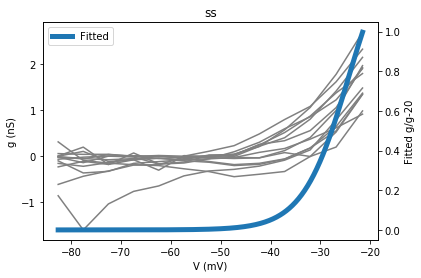

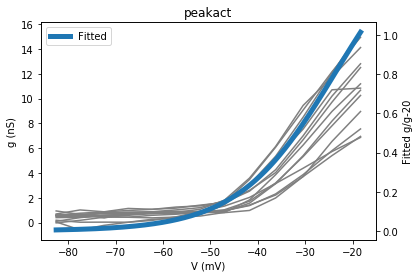

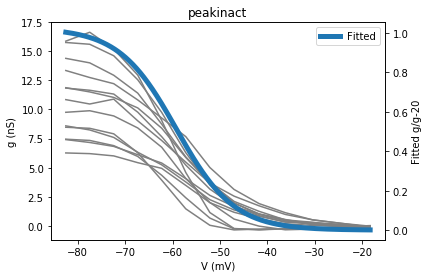

In [5]:
for key in pdata:
    plt.figure()
    
    ax1 = plt.subplot(111)
    ax1.set_title(key)
    ax1.plot(pdata[key][1, ...], pdata[key][0, ...], '-', color='gray')
    ax1.set_xlabel('V (mV)')
    ax1.set_ylabel('g (nS)')
    
    ax2 = ax1.twinx()
    ax2.plot(fittedpts[key][1, :], fittedpts[key][0, :], lw=5, label='Fitted')
    ax2.set_ylabel('Fitted g/g-20')
    
    ax2.legend()
    
    plt.show()

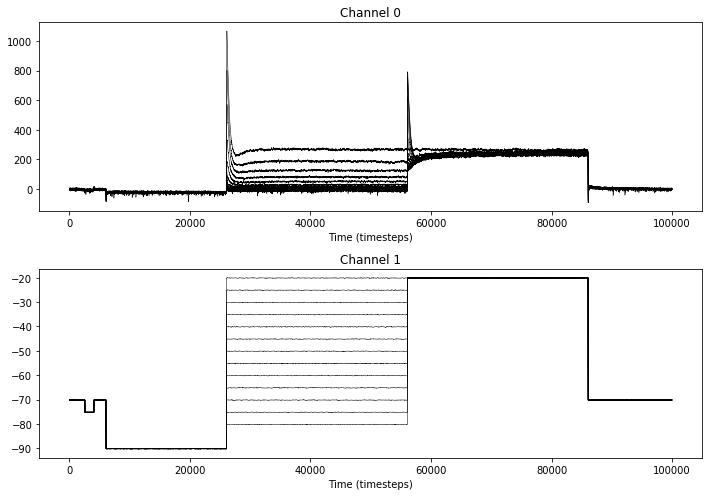

In [6]:
beautiful_gating.plot()

# Gating curves

## Fast current

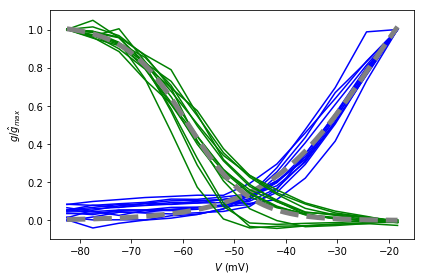

In [7]:
plt.figure()

plt.subplot(111)
plt.plot(
    pdata['peakact'][1, ...], 
    (
        pdata['peakact'][0, ...] 
        / pdata['peakact'][0, -1, :]
        # Todo: add scaling factor
    ), 
    color=colors['IA_activation']
)
plt.plot(
    fittedpts['peakact'][1, :],
    fittedpts['peakact'][0, :],
    '--', lw=dash_lw, color=colors['fitted']
)
plt.plot(
    pdata['peakinact'][1, ...], 
    (
        pdata['peakinact'][0, ...] 
        / pdata['peakinact'][0, 0, :]
        # Todo: add scaling factor
    ), 
    color=colors['IA_inactivation']
)
plt.plot(
    fittedpts['peakinact'][1, :],
    fittedpts['peakinact'][0, :],
    '--', lw=dash_lw, color=colors['fitted']
)
plt.xlabel('$V$ (mV)')
plt.ylabel(r'$g/\hat{g}_{max}$')

plt.tight_layout()

plt.show()

# Steady-state current

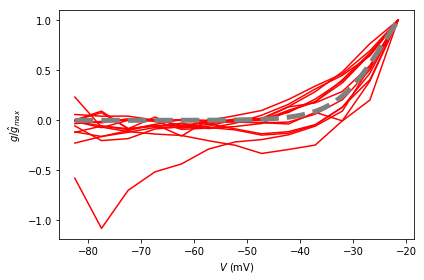

In [8]:
plt.figure()

plt.subplot(111)
plt.plot(
    pdata['ss'][1, ...], 
    (
        pdata['ss'][0, ...] 
        / pdata['ss'][0, -1, :]
        # Todo: add scaling factor
    ), 
    color=colors['steady_state']
)
plt.plot(
    fittedpts['ss'][1, :],
    fittedpts['ss'][0, :],
    '--', lw=dash_lw, color=colors['fitted']
)
plt.xlabel('$V$ (mV)')
plt.ylabel(r'$g/\hat{g}_{max}$')

plt.tight_layout()

plt.show()

# Other parameters
## Maximal conductance

/home/eharkin/miniconda3/envs/neopozz/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/eharkin/miniconda3/envs/neopozz/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


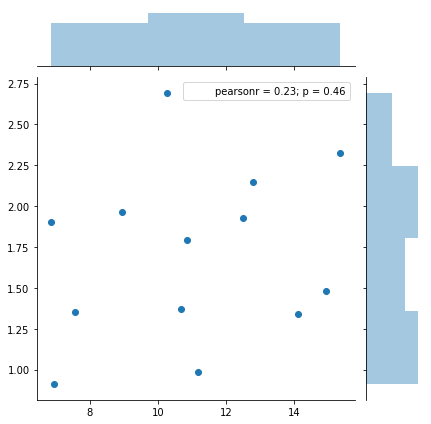

In [9]:
sns.jointplot(
    pdata['peakact'][0, -1, :],
    pdata['ss'][0, -1, :]
)

## Decay tau

In [10]:
# TODO